In [24]:
!pip install nltk
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import re
from nltk.corpus import stopwords
from sklearn.model_selection import GridSearchCV #for my gridsearch
plt.rcParams["figure.figsize"] = [12,8] #setting the size of graphs
hamColor = "blue"
spamColor = "orange"

******PROJECT DESCRIPTION ******SMS Spam Detection Machine Learning ******Classification ******Mitchell Henderson CSPB 3022 


Description of data: The SMS Spam Collection is a public set of SMS labeled messages that have been collected for mobile phone spam research.

Unicamp location: https://www.dt.fee.unicamp.br/~tiago/smsspamcollection/

Kaggle location: https://www.kaggle.com/uciml/sms-spam-collection-dataset 

Source:
Tiago A. Almeida (talmeida@ufscar.br)
Department of Computer Science
Federal University of Sao Carlos (UFSCar)
Sorocaba, Sao Paulo - Brazil

Jose Maria Gomez Hidalgo (jmgomezh@yahoo.es)
R&D Department Optenet
Las Rozas, Madrid - Spain


Hello my name is Mitch Henderson. This is my final project for CSPB 3022, Intro to Data Science Algorithms.  Here in my github repo, you will find both a Jupyter notebook and a CSV file. When you run my Jupyter notebook,  you will see that I import a CSV of messages that are either spam or ham. I use machine learning to perform a classification.

With the preponderance and growing issue of spam text messages I thought this problem will be a good topic to explore. More and more organizations are requiring cell phone numbers to stay in contact up-to-date or even use them as primary communication method. The goal is to help consumers filter out legitimate messages from the unsolicited spam. 

Therefore, I developed a model that can take a message and predict whether it is spam of ham. I will be using a model called “Bag of Words” – effectively this turns any piece of text into a vector.

The database that I am using comes from Kagle and the links to the original data set are all provided here with the original URL location and the two authors of the dataset. This dataset consists of roughly 5000 text messages, out of these 5000, roughly 750 of these messages are spam.

To start, let me introduce the concept of “cleaning”.  I have all of these words in my text messages that will have a mix of upper and lower case, various punctuations, white space, and I need to make the messages consistent since many of these abnormalities might not hold any predictive value.  All machine learning problems require the first step to be to import the data and then to clean it.  

First, here, with this function, I’m importing the data I am beginning my exploratory data analysis also known as EDA and Please note this particular message “I HAVE A DATE ON SUNDAY WITH WILL!!”  - this message is in all caps and I want to turn it into all lower case to make sure all messages are in a consistent format, this is setting us up to be able to use our bag of words model.


In [26]:
#Importing the data. Beginning the EDA. Using the describe function which gives us a summary of our data.
#First 20 messages

df = pd.read_csv("spam_XLS_utf8.csv")
df.head(20)



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


I’m using this describe function here which gives us a summary of the first 20 messages or so. 

In [27]:
df.describe()
#describing the data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


Here is the size of the data set and then here I am creating a function I go through and get rid of the special characters, also by the nature of my data set I don’t have any NaNs.

In [28]:
df.v1.value_counts()
#Size of data
#Shows us the number of ham vs spam messages

ham     4825
spam     747
Name: v1, dtype: int64

Here I will take each message and split it by word, this is a process that I call “tokenizing” in my code.

In [29]:
#Creating a helper function
#Cleaning data

def cleanToken(w):
    w = w.lower()
    w = re.sub(r"\W", "", w) #removes One non-word character
    w = re.sub(r"\s", "", w) #removes One whitespace
    return w

Here is our frequency dictionary – this is still part of my cleaning.  What we are first going to do to build out our bag of words data representation, the first time around we are going to go through and count the number of times each unique word appears across all messages, and we’ll refer to this as our frequency dictionary which stores our unique words and their frequency of appearances.

Just about any message will contain words like “the”, “and”, “or”, we refer to these words as “stop words”  as they contain no predictive value. They aren’t very helpful in classifying to ham or spam and I use the python library NLTK to get rid of them.

In [30]:
#Creating our frequency dictionary
#Cleaning data
#Cleaning Stop words
#tokenizing

freq = {} 
stop_words = set(stopwords.words('english')) #getting rid of our "stop words" such as "the", "or", "and", etc... NLTK python library

for index,row in df.iterrows():
    
    for w in row["v2"].split(" "):
        w = cleanToken(w)
        
        if w != "" and w not in stop_words: #getting rid of empty strings and stopwords before they get added
            if w in freq: #if key in dictionary
                freq[w] += 1 #when I've already seen a word and want to increment it in my dictionary
            else:
                freq[w] = 1 #each time I see a word for the first time
                

for k, v in freq.items(): #iterable object that goes through our dictionary
    #print(k,v)
    pass

print(len(freq))


9420


In [31]:
#Creating our list of frequencies
#visualization

y = [] #creating our empty list
top_words = [] #our top most occuring words
for word in sorted(freq, key = freq.get, reverse = True):
    y.append(freq[word])
    top_words.append(word) #capturing the top words, non-inclusive of the stop words
    #print(word) #uncomment to view
#print(top_words)
#print(y)


Now that we have our frequency dictionary and we know how often each words shows up, let’s take a look at our distribution.  Here is a visualization of our distribution of words and I index them by the nth most common word. As you can see it’s a pretty sharp drop from the first ten or so. We can see that the most occurring words show up a LOT more than the less common words. It would appear that there is an exponential decay in the number of times a word appears. 

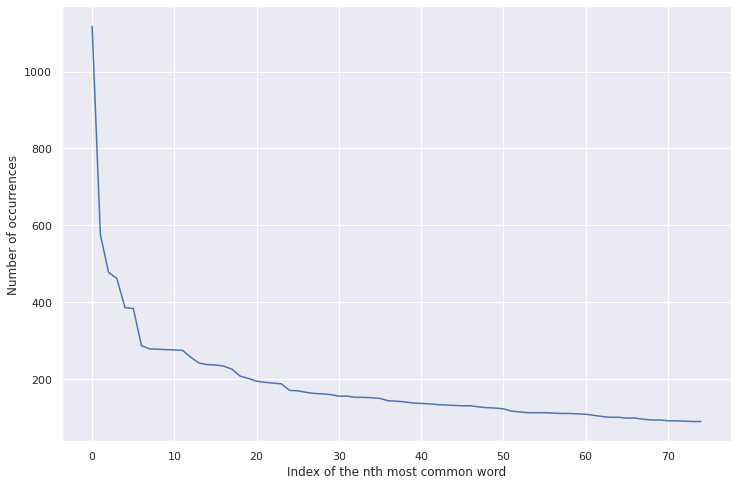

In [32]:
#Our distribution of words
#We are exploring data here, part of the EDA
#visualization plot

plt.plot(y[0:75]) #we can change this value to see the distribution of word frequencies
plt.xlabel("Index of the nth most common word")
plt.ylabel("Number of occurrences")
plt.show()


The first step was to count the number of times each word appears. The second step is to now take each individual message and convert them into a vector.  This vectorized message holds a count for the top occurring words within that message.  As an example, if I had the phrase “Mary had a little lamb", imagine if after we did our frequency count, we found the top occurring words were maybe [“Mary”, "little", "lamb", "the", "and", "a"], the first thing in this vector would be to count the number of times “Mary” shows up, and the how many times the word “little“ shows up and so on. The python implementation of this is in my helper function where I vectorize messages, tokenize a message with top words, and return a dictionary.

In [33]:
#helper function - vectorize
#vectorize some message (take in a message, top words, and return a dictionary)

def vectorize(message, top_words):
    vector = dict.fromkeys(top_words, 0)
    for w in message.split(" "):
        w = cleanToken(w) #reassigning w to be the "cleaned version" of itself. 
        if w in vector:
            vector[w] += 1 #grabbing the key value pair for this specific word and incrementing its value by 1
    return vector
    #print(vector) #test message
#vectorize("Mary had a little lamb", ["little", "lamb", "the", "and", "a"]) #small test case #uncomment to view



I hope to end up with a high number of words that have high frequency that have strong predictive value of what words are indicative of spam and which ones are indicative of ham.

I have a for loop that that goes through the messages and applies the vectorization, building out the bag of words dataset. 

In addition to the bag of words, we also feature engineer the length and the word count of each message.

In [34]:
#Bag of words
#Iterate through original dataset, clean the words the exact same way we did with our freq dictionary
#create our vectors
#We should end up with new pandas dataframe with each frequently occuring word 
#together with a classification if the word is spam or ham

vectors = [] #holding all of our vectorized rows
for index,row in df.iterrows():
    v = vectorize(row["v2"],top_words[:200]) #grabbing the top words and vectorizing them. Set at 100 originally
    v["classification"] = row["v1"]  #adding a key whether its ham or spam
    v["length"] = len(row["v2"]) #looking at the length of each text message. This will give us a character count.
    v["wordCount"] = len(row["v2"].split(" ")) #adding the length of the text message in terms of words.
    vectors.append(v) #appending onto our list. Now we can create our pandas dataframe

BoW_dataframe = pd.DataFrame(vectors) #passing in vectors to this dataframe function, 
#converting our list of dictionaries to a panda dataframe
BoW_dataframe.head() #printing our vectorized dataset. This is now "machine model learning" ready

    

,u,call,2,im,get,ur,4,dont,go,ok,...,never,special,meeting,job,draw,18,5,classification,length,wordCount
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,ham,111,20
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,ham,29,6
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,spam,155,28
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ham,49,11
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,ham,61,13


Now that we have our bag of words model, it would be nice to see if there are any noticeable trends. Here I’ve created a stacked bar chart of the top 10 words, as you can see these words like you, call, 2 and I’m are represented in the bar charts and show us the number of times they appear across all messages. 

We are getting interesting results, the word “u” appears more often in ham, whereas “call” tends to appear more often in spam. 


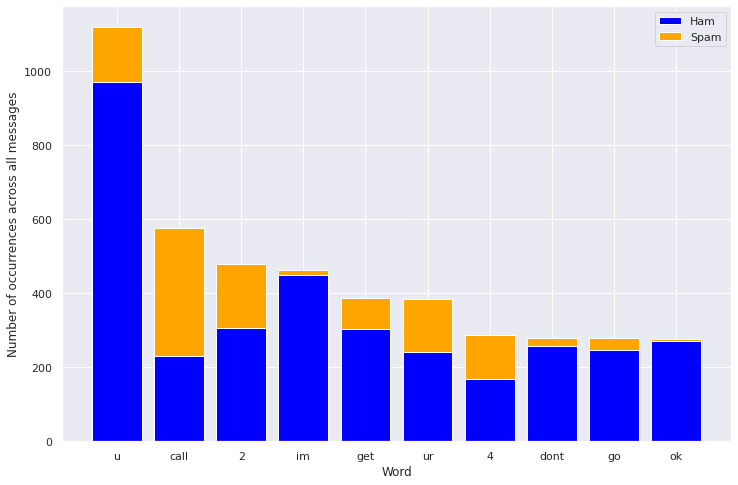

In [35]:
#Creating a stacked bar chart of top 10 words
#visualization

hamFrame = BoW_dataframe[BoW_dataframe.classification == "ham"] #this grabs only the entries in dataframe where its labeled ham
hamCount = hamFrame[top_words[:10]].sum().values #list of top ten strings which are also in the hamFrame

spamFrame = BoW_dataframe[BoW_dataframe.classification == "spam"] #this grabs only the entries in dataframe where its labeled spam
spamCount = spamFrame[top_words[:10]].sum().values #list of top ten strings which are also in the spamFrame

plt.bar(top_words[:10],hamCount, label= "Ham", color = hamColor) #total number across all ham messages
plt.bar(top_words[:10],spamCount, bottom = hamCount, label="Spam", color = spamColor) #total number across all spam messages
plt.legend()

plt.xlabel("Word")
plt.ylabel("Number of occurrences across all messages")
plt.show()




In our next bar chart, we show a stacked bar chart of average word count for both spam and ham messages

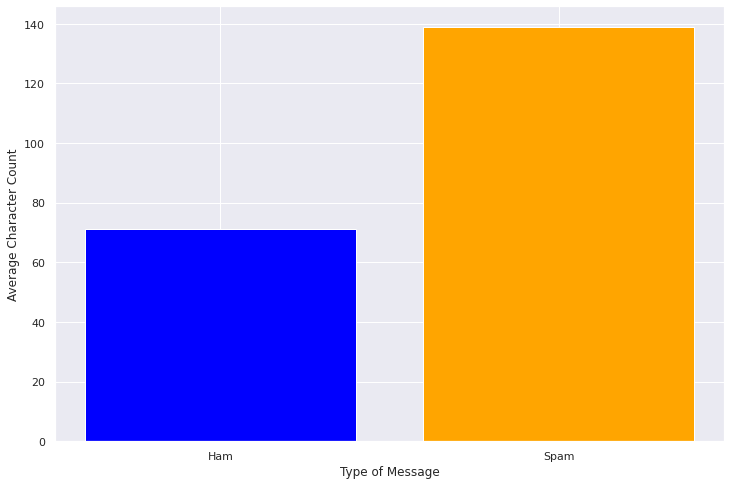

In [36]:
#Further EDA
#visualization
#Why is this performed? Creating a stacked bar chart of average word count for both spam and ham messages

averageHamLength = hamFrame.length.mean() #getting the average character count for ham messages
#print(averageHamLength)

averageSpamLength = spamFrame.length.mean() #getting the average character count for spam messages
#print(averageSpamLength)

plt.bar(["Ham", "Spam"], [averageHamLength, averageSpamLength], color = [hamColor, spamColor])
plt.xlabel("Type of Message")
plt.ylabel("Average Character Count")
plt.show()




Next, we check messages for co-occurrence of words, here I am taking these and I look at probability of each word both in the ham and the spam data set, then I check for  spam over ham plus a very small value of epsilon, which I set to .0001 here. It is important for us to look at the words that have a high probability of appear in spam and not ham, and vice versa.

Text(0, 0.5, 'observed probability')

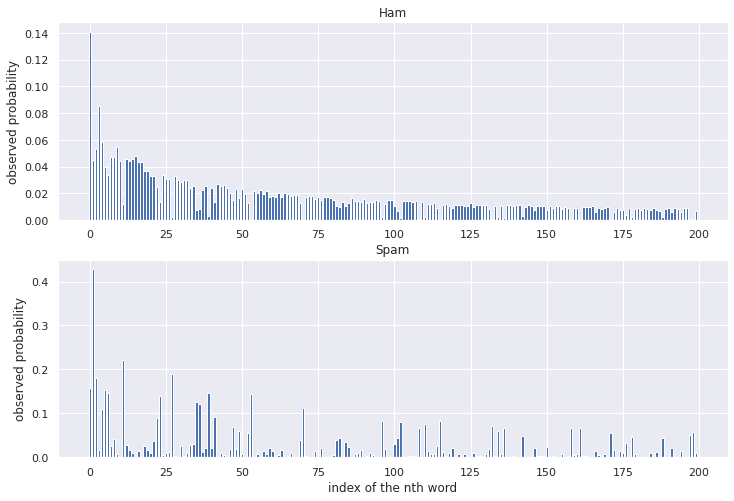

In [37]:
#EDA and visualization and analysis
#Why is this performed? Exploring feature importance
#Plotting nth word occurrence probability across ham and spam messages to check for co-occurrence of words

conciseDataHamFrame = hamFrame.drop(columns = ["classification", "length", "wordCount"])
conciseDataSpamFrame = spamFrame.drop(columns = ["classification", "length", "wordCount"])

wordFreqHam = conciseDataHamFrame.astype(bool).sum(axis=0) / len(hamFrame)
x = list(range(len(wordFreqHam)))

wordFreqSpam = conciseDataSpamFrame.astype(bool).sum(axis=0) / len(spamFrame)
y = list(range(len(wordFreqSpam)))

fig,ax = plt.subplots(2,1)

ax[0].bar(x,wordFreqHam.values)
ax[0].set_title("Ham")
#ax[0].set_xlabel("index of the nth word")
ax[0].set_ylabel("observed probability")

ax[1].bar(y,wordFreqSpam.values)
ax[1].set_title("Spam")
ax[1].set_xlabel("index of the nth word")
ax[1].set_ylabel("observed probability")


#print(x)
#plt.bar(x, wordFreqHam.values)
#print(wordFreqHam.index.values)



I am looking to see words that appear much more in spam and this here gives me a very strong list of words that appear overwhelmingly within spam such as “claim”, “prize”, “guaranteed”, and “18”.

This is giving me very good data to determine where these words are appearing and whether or not they might be able to predict whether or not a message is indeed spam.  At this stage of the EDA, this is a hint at which model will work best, for example a decision tree should be able to find these words and classify each message, it’s a rule-based system that makes splits based on a set of heuristics of yes/no questions.

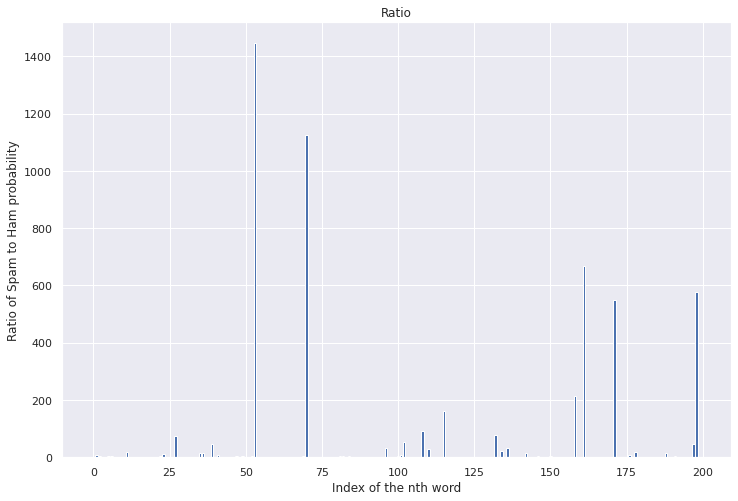

claim         1445.783133
prize         1124.497992
guaranteed     669.344043
18             575.635877
tone           548.862115
16             213.490274
urgent         161.316633
nokia           90.882794
service         77.812645
txt             73.479042
win             51.794213
mobile          45.473892
draw            44.769441
customer        33.377203
cash            31.564941
contact         28.977650
per             23.285612
free            18.334070
mins            17.593573
stop            16.642554
dtype: float64

In [38]:
#EDA and visualization
#Exploring feature importance analysis
#Why is this performed? Looking at ratio of above two graphs
#for each index I am plotting: spam / (ham + epsilon)
#This is giving is words that appear much much more in spam text messages, than in ham text messages.
#We find that some words have an extraordinarily higher ratio (such as "claim" and "prize") of appearing in 
#...Spam than in Ham text messages.

epsilon = .0001
ratio = wordFreqSpam / (wordFreqHam + epsilon)

plt.bar(y,ratio.values)
plt.title("Ratio")
plt.xlabel("Index of the nth word")
plt.ylabel("Ratio of Spam to Ham probability")
plt.show()
#print(ratio)
#print(ratio.columns)

ratio.sort_values(ascending = False)[:20]


Project topic: (5 pts)




In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample #Bringing in resample for my upsamples

I create my test and train split of my data. This will be used to train my models and then test them accordingly.

In [40]:
#Test / Train split of my data
X = BoW_dataframe.drop(columns = "classification")
y = BoW_dataframe.classification

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state=42) #makes sure that we shuffle the data in the same way.
print(X_train.shape)
print(X_test.shape)



(3733, 202)
(1839, 202)


When I was reviewing the data initially there were far more ham messages than spam messages. Because of this we will want to make sure we have a balanced dataset as that will work better for some of the models. Balance is a problem within machine learning - where there is a one example in the minority class for hundreds or thousands of cases in the majority class.

In [41]:
#Upsampling
df_Spam_Upsampled = resample(spamFrame, 
                             replace=True, #sampling with replacements
                            n_samples= len(hamFrame), #getting my hamframe length to equal n_samples
                            random_state=123) #setting my random number generator

df_Upsampled = pd.concat([hamFrame, df_Spam_Upsampled]) #combining majority ham frame with upsampled spam minority class

X_Upsample = df_Upsampled.drop(columns = "classification")
y_Upsample = df_Upsampled.classification


X_train_Upsample, X_test_Upsample, y_train_Upsample, y_test_Upsample = train_test_split(X_Upsample,y_Upsample,test_size=.33,random_state=42)


Here I do my imports for my different machine learning models.

In [42]:
from sklearn import neighbors #For KNN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


Then I create this function for the grid search and cross validation. For every model that I am considering, I want to do a grid search for hyperparameter tuning and then cross validation. Since I will be doing this for every model I decided to write a function for 

In [43]:
#this function is responsible for gridsearch, crossvalidation

def trainModel(CLF,parameters,X,y,numFolds=10):

    gridsearch = GridSearchCV(CLF, parameters, cv=numFolds) #can try different cv values here as well
    gridsearch.fit(X,y)
    print("******************" + type(CLF).__name__ + "******************")
    print("Here are our optimal parameters ",gridsearch.best_params_)
    print("Here is our score:",gridsearch.best_score_) #prints out parameters that did best and their respective scores.

    bestCLF = gridsearch.best_estimator_ #returning our best classifier
    results = cross_val_score(bestCLF, X, y, cv = numFolds) #returns the cross validation scores
    print(f"Here is the mean from the cross validation score from the "+ type(CLF).__name__ + " classifier: {results.mean()}") #gives us the mean across all scores
    print(f"Here is the standard deviation from the cross validation results: {results.std()}") #returning the standard dev
    print(f"Here are the actual results: {results}") #numpy array of results
    print()
    print()
    print()
    return bestCLF
    #Look up sklearn models for other classifiers. Code will look very similar



Here are my models and I will give a brief description of each:

First is KNN, or K nearest neighbor, we use KNN to predict new values to make class predictions.  We are looking at geometric distance and finding the nth nearest neighbor resembling any new sample. Whatever class the majority of class the neighbors belong to then that will be the predicted class for the new sample.

Logistic regression, this is essentially the classification version of linear regression.

Then we have decision tree predictive modeling approach where the observations are the branches and the conclusions about our target value are in the leaves. This decision tree model is a rule-based approach where the model is responsible for finding splits in the data and continuously making them until there is a high accuracy in the prediction.

Then we have random forest. Random forest is a collection of decision trees, each is slightly different than the other, where we might likely get better results here as opposed to just a single decision tree. 

Support vector machines are when we draw a line for classification purposes, the samples on one side are classified as spam and the other side is ham.

And then we have linear discriminate analysis. It is a linear classifier that takes into account empirical probabilities from the dataset.  Because LDA takes into account empirical probabilities, its decision making process depends heavily on how well balanced the data is.


In [44]:
#List of classifiers
classifiers = []

#knn
knnCLF = neighbors.KNeighborsClassifier()
knnParams = {'n_neighbors':[5,25,57], 'p':[1,2]} #parameters must be appropriate to model being evaluated
knnDictionary = {"classifier": knnCLF, "params": knnParams} #dictionary of key value pairs and parameters
#print(knnDictionary["params"])
classifiers.append(knnDictionary) #data structure to hold classifier and parameters
#print(classifiers)

#logistic regression
lrCLF = LogisticRegression(max_iter=1000, random_state=0) #creating logistic regression model
lrParamGrid = {"penalty": ["l2"], "C": [1.0,0.9,0.7]}  #hyperparameters
lrDictionary = {"classifier": lrCLF, "params": lrParamGrid}
classifiers.append(lrDictionary)

#Decision Tree
dtcCLF = DecisionTreeClassifier(random_state=0)
dtcParamGrid = {"max_depth": [5,20,250]} #hyperparameters
dtcDictionary = {"classifier": dtcCLF, "params": dtcParamGrid}
classifiers.append(dtcDictionary)

#Random Forest
rfcCLF = RandomForestClassifier(max_depth=60, random_state=0) 
#Changing the max_depth hyperparameter will change results
rfcParamGrid = {}
rfcDictionary = {"classifier": rfcCLF, "params": rfcParamGrid}
classifiers.append(rfcDictionary)

#Support Vector Machine - Upsampled
svmCLF = SVC() #baseline
svmParamGrid = {}
svmDictionary = {"classifier": svmCLF, "params": svmParamGrid}
classifiers.append(svmDictionary)

#LinearDiscriminantAnalysis
ldaCLF = LinearDiscriminantAnalysis()
ldaParamGrid = {}
ldaDictionary = {"classifier": ldaCLF, "params": ldaParamGrid}
classifiers.append(ldaDictionary)



And this is our for a loop that goes through each classifier and trains each one, we are given series of outputs.  We train our models on both data sets, one on non-up sampled and one on up sampled data - but then we will test inly on non up-sample data. 


We will be given optimal parameters. And then we are running a cross validation and given an accuracy score, mean, standard deviation.

We are given the actual results from the cross validation.

Random Forest has the highest accuracy score, again looking at cross validation. It outperformed all the others. The random forest classifier comes in with an accuracy score of .98 score.

That’s not to say the others still come very close in fact they do- Decision Tree comes in at .974 and Logistic Regression at .97.


In [45]:
#For loop that goes through each classifier and trains each one

bestClassifiers = []
bestClassifiersUpsampled = []
for c in classifiers: #we can use indexing here to select out a specific model such as [classifiers[-1]]
    print("Training on non-upsampled data: ")
    bestModel = trainModel(c["classifier"], c["params"],X_train,y_train)
    bestClassifiers.append(bestModel)
    print("Training on upsampled data:")
    bestModelUpsampled = trainModel(c["classifier"], c["params"],X_train_Upsample,y_train_Upsample)
    bestClassifiersUpsampled.append(bestModelUpsampled)
    




Training on non-upsampled data: 
******************KNeighborsClassifier******************
Here are our optimal parameters  {'n_neighbors': 25, 'p': 1}
Here is our score: 0.936237473297874
Here is the mean from the cross validation score from the KNeighborsClassifier classifier: {results.mean()}
Here is the standard deviation from the cross validation results: 0.009977857183224994
Here are the actual results: [0.93582888 0.95454545 0.94385027 0.93565684 0.9383378  0.93297587
 0.93029491 0.93297587 0.91420912 0.94369973]



Training on upsampled data:
******************KNeighborsClassifier******************
Here are our optimal parameters  {'n_neighbors': 5, 'p': 1}
Here is our score: 0.9279168919662553
Here is the mean from the cross validation score from the KNeighborsClassifier classifier: {results.mean()}
Here is the standard deviation from the cross validation results: 0.00872379361875988
Here are the actual results: [0.93353941 0.94126739 0.92890263 0.91962906 0.93353941 0.90866873

Now that we are ready to proceed with testing and found the best versions of each model, we can inspect their performance on unseen data and measure how well they do based on the confusion matrix and looking at their classification report. 

For logistic regression and LDA, because they have thresholds for their classification, we are also able to plot their ROC curve which shows us the relationship between precision and recall based on certain threshold values.

In addition to our classification report for each model, we also have our confusion matrix. The confusion matrix is a useful visualization to see exact numbers of what got classified as what.

For example, below is support vector machines - and we can see that based on the labels in 272 cases where it was classified as spam, but in reality it’s ham. 272 is kind of high number when you look at some of the other outputs. LDA for example is 47.


******************KNeighborsClassifier******************
              precision    recall  f1-score   support

         ham       0.96      0.97      0.96      1587
        spam       0.79      0.72      0.75       252

    accuracy                           0.93      1839
   macro avg       0.87      0.84      0.86      1839
weighted avg       0.93      0.93      0.93      1839



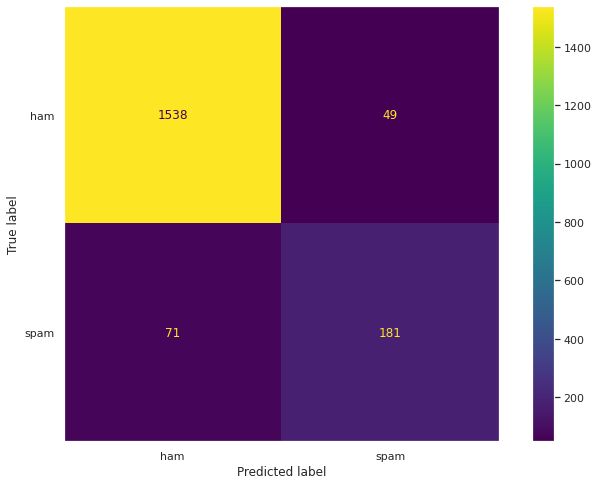

******************LogisticRegression******************
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1587
        spam       0.93      0.84      0.88       252

    accuracy                           0.97      1839
   macro avg       0.95      0.92      0.93      1839
weighted avg       0.97      0.97      0.97      1839



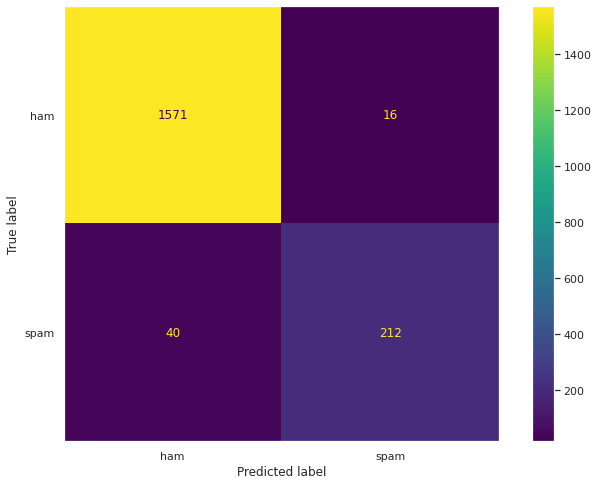

****************** LogisticRegression ROC Curve ******************


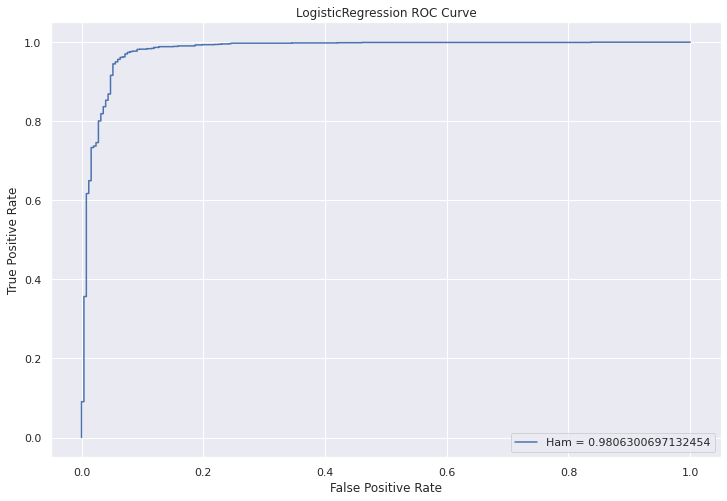

******************DecisionTreeClassifier******************
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      1587
        spam       0.87      0.85      0.86       252

    accuracy                           0.96      1839
   macro avg       0.92      0.92      0.92      1839
weighted avg       0.96      0.96      0.96      1839



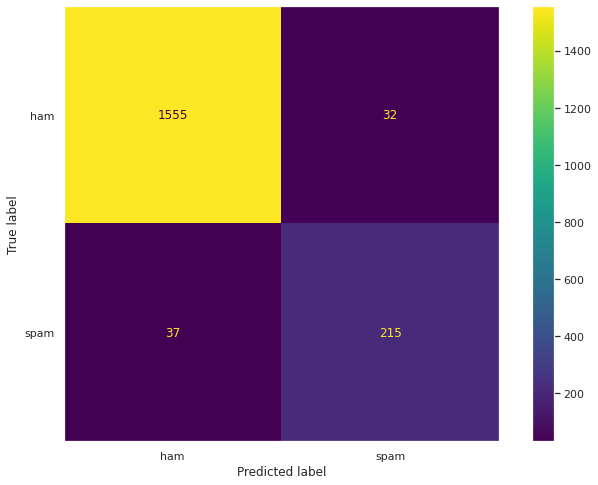

******************RandomForestClassifier******************
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1587
        spam       0.96      0.88      0.92       252

    accuracy                           0.98      1839
   macro avg       0.97      0.94      0.95      1839
weighted avg       0.98      0.98      0.98      1839



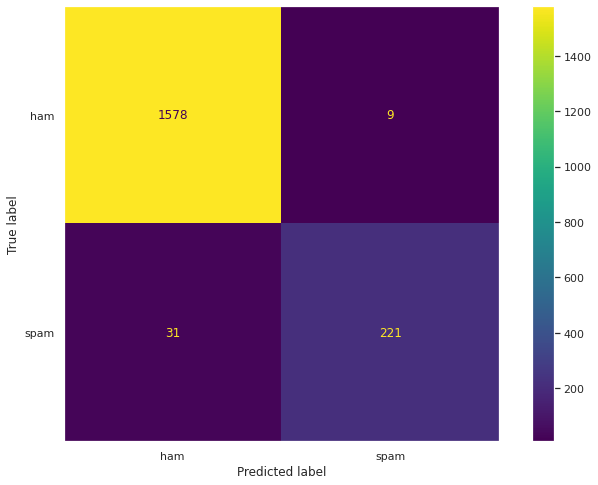

******************SVC******************
              precision    recall  f1-score   support

         ham       0.94      0.97      0.95      1587
        spam       0.76      0.62      0.68       252

    accuracy                           0.92      1839
   macro avg       0.85      0.80      0.82      1839
weighted avg       0.92      0.92      0.92      1839



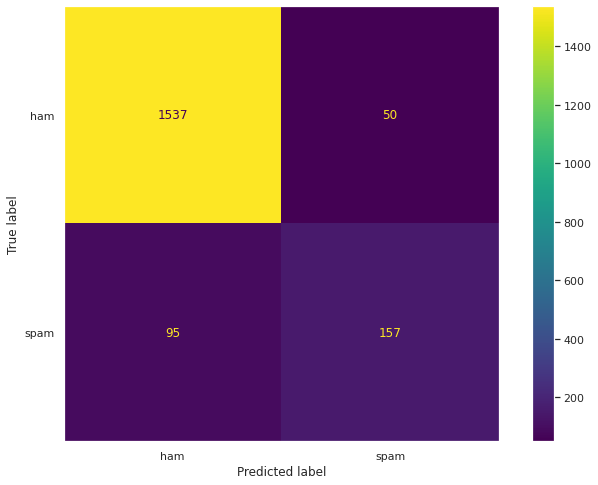

******************LinearDiscriminantAnalysis******************
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1587
        spam       0.95      0.83      0.88       252

    accuracy                           0.97      1839
   macro avg       0.96      0.91      0.93      1839
weighted avg       0.97      0.97      0.97      1839



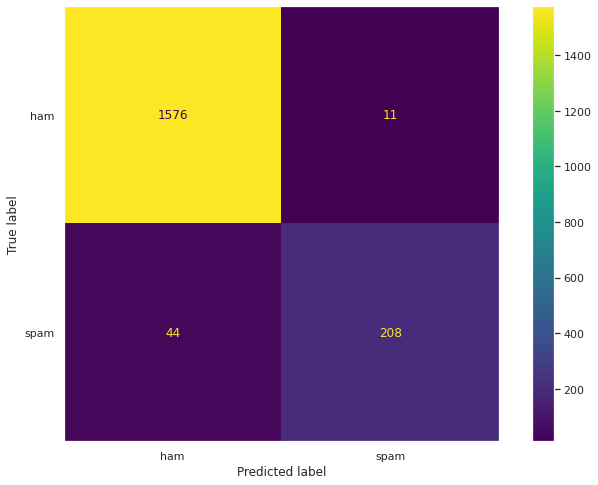

****************** LinearDiscriminantAnalysis ROC Curve ******************


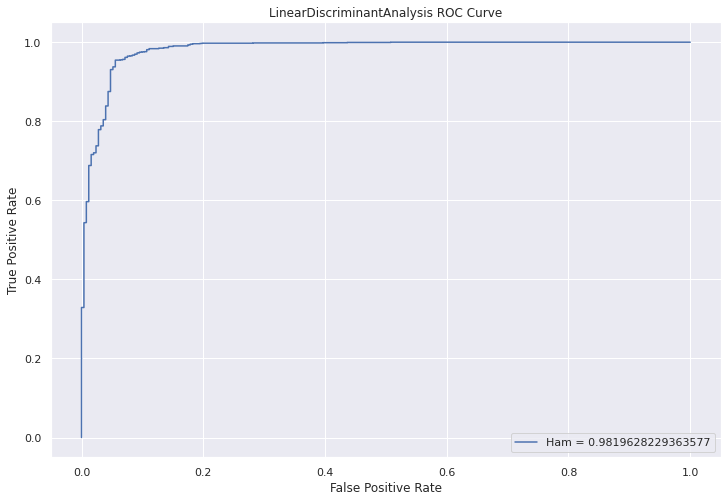

In [46]:
#Final testing. Testing against the test set
#plotting our ROC curve

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, accuracy_score, roc_curve, auc

for classifier in bestClassifiers:
    print("******************" + type(classifier).__name__ + "******************")
    yPred = classifier.predict(X_test) #actual predicted values
    print (classification_report(y_test, yPred, target_names = ["ham", "spam"]))  #comparing what I predicted with what it actually is
    plot_confusion_matrix(classifier,X_test,y_test)
    plt.grid()
    plt.show()
 

    if type(classifier).__name__ in ["LogisticRegression", "LinearDiscriminantAnalysis"]:
        
        yProb = [yprob[0] for yprob in classifier.predict_proba(X_test)]
        
        #print(yProb[:10])
        print("****************** " + type(classifier).__name__ + " ROC Curve ******************")
        fp, tp, _ = roc_curve(y_test, yProb, pos_label = "ham")
        aucNum = auc(fp,tp)
        plt.plot(fp,tp, label= 'Ham = ' + str(aucNum));
        plt.title(type(classifier).__name__ + " ROC Curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend();
        plt.show();

#Precision: How often is it true when we call it true? false-negatives
#recall: How many did we detect to be true? Did we actually detect it? Ignores false-positives.


Within the classification report here is what I find most important. I want to maximize the true hams coming through at the expense of potentially letting some spam messages sneak through. This way I ensure that the legitimate messages always get through. Bias to everything being ham unless proven otherwise.  A spam getting through is bad but not the end of the world, but a ham message should always get through.

******************KNeighborsClassifier******************
              precision    recall  f1-score   support

         ham       1.00      0.90      0.94      1587
        spam       0.60      0.98      0.74       252

    accuracy                           0.91      1839
   macro avg       0.80      0.94      0.84      1839
weighted avg       0.94      0.91      0.92      1839



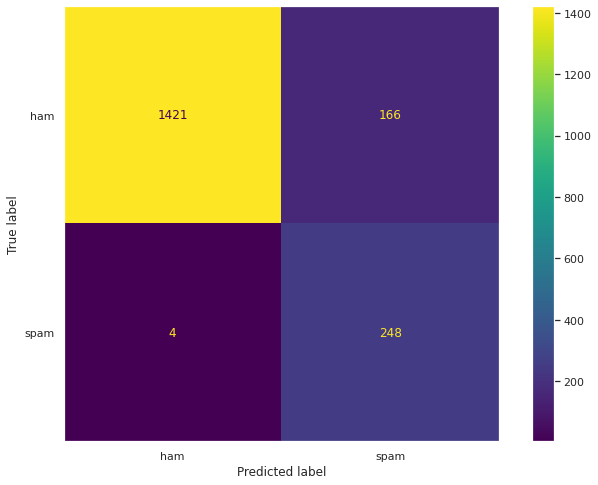

******************LogisticRegression******************
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      1587
        spam       0.82      0.95      0.88       252

    accuracy                           0.97      1839
   macro avg       0.91      0.96      0.93      1839
weighted avg       0.97      0.97      0.97      1839



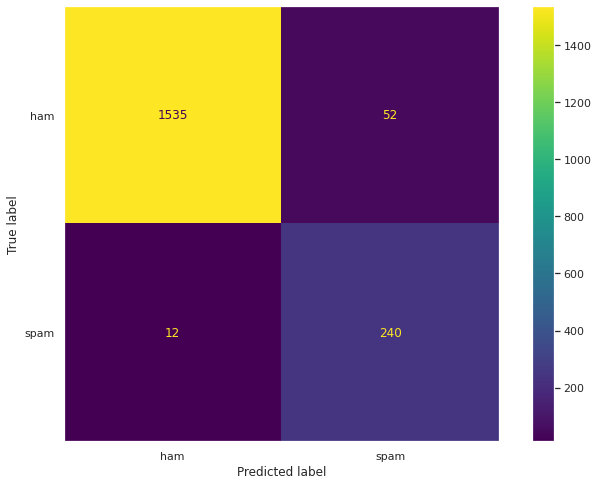

******************DecisionTreeClassifier******************
              precision    recall  f1-score   support

         ham       1.00      0.99      0.99      1587
        spam       0.92      1.00      0.96       252

    accuracy                           0.99      1839
   macro avg       0.96      0.99      0.98      1839
weighted avg       0.99      0.99      0.99      1839



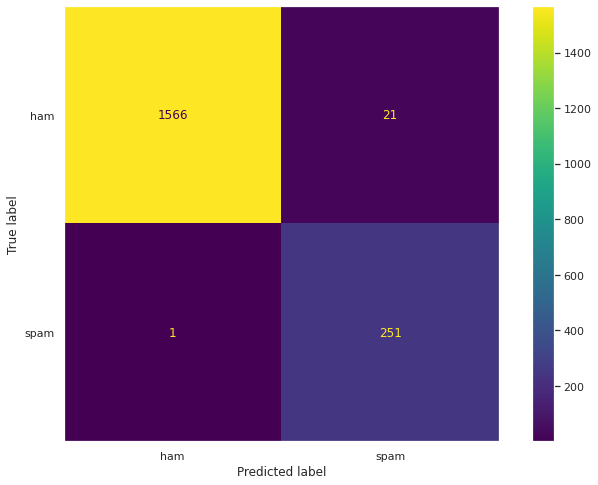

******************RandomForestClassifier******************
              precision    recall  f1-score   support

         ham       1.00      0.99      1.00      1587
        spam       0.95      1.00      0.97       252

    accuracy                           0.99      1839
   macro avg       0.98      0.99      0.98      1839
weighted avg       0.99      0.99      0.99      1839



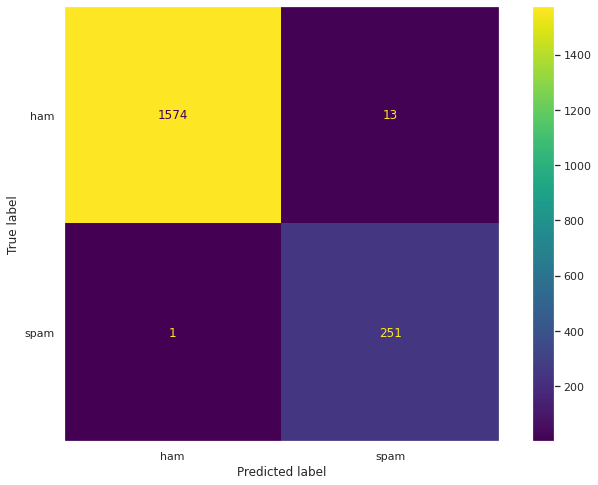

******************SVC******************
              precision    recall  f1-score   support

         ham       0.98      0.83      0.90      1587
        spam       0.46      0.91      0.61       252

    accuracy                           0.84      1839
   macro avg       0.72      0.87      0.75      1839
weighted avg       0.91      0.84      0.86      1839



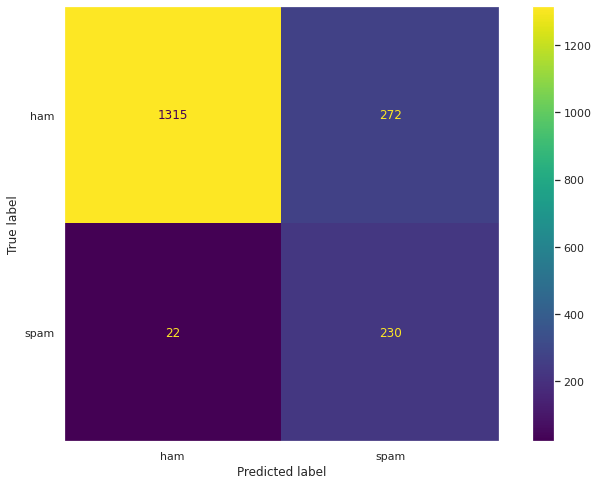

******************LinearDiscriminantAnalysis******************
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      1587
        spam       0.83      0.93      0.88       252

    accuracy                           0.97      1839
   macro avg       0.91      0.95      0.93      1839
weighted avg       0.97      0.97      0.97      1839



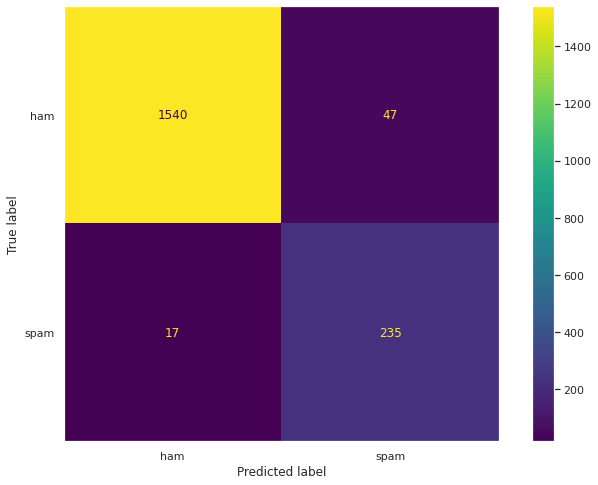

In [47]:
for classifier in bestClassifiersUpsampled:
    print("******************" + type(classifier).__name__ + "******************")
    yPred = classifier.predict(X_test) #actual predicted values
    print (classification_report(y_test, yPred, target_names = ["ham", "spam"]))  #comparing what I predicted with what it actually is
    plot_confusion_matrix(classifier,X_test,y_test)
    plt.grid()
    plt.show()

In conclusion, If I were responsible for creating a machine learning model that decides whether a text message is ham or spam, the model I would choose is Random Forest. 

******************RandomForestClassifier******************
              precision    recall  f1-score   support

         ham       1.00      0.99      1.00      1587
        spam       0.95      1.00      0.97       252

    accuracy                           0.99      1839
   macro avg       0.98      0.99      0.98      1839
weighted avg       0.99      0.99      0.99      1839



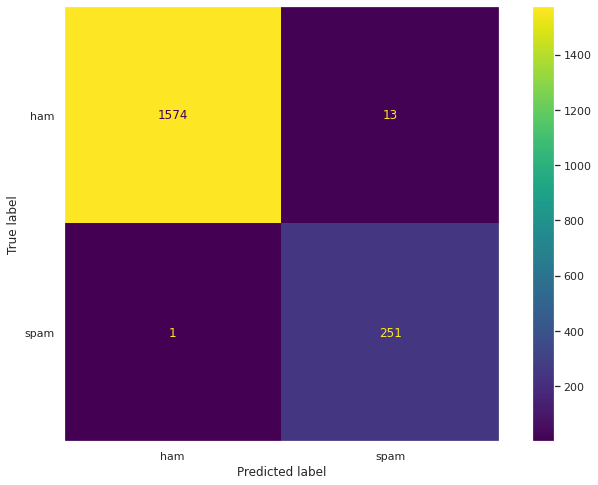

In [48]:
#I have shown that for this type of classification, the Random Forest model performs the best. 

for classifier in bestClassifiersUpsampled:
    if type(classifier).__name__ in ["RandomForestClassifier"]:

        print("******************" + type(classifier).__name__ + "******************")
        yPred = classifier.predict(X_test) #actual predicted values
        print (classification_report(y_test, yPred, target_names = ["ham", "spam"]))  #comparing what I predicted with what it actually is
        plot_confusion_matrix(classifier,X_test,y_test)
        plt.grid()
        plt.show()
